In [2]:
import os
import scipy.io.wavfile
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt

In [3]:
import pydub
from pydub import AudioSegment

In [4]:
import scipy.signal as signal

In [25]:
filename_1 = os.listdir("./Data/DSD100subset/Mixtures/Dev/")[0]

In [26]:
rate, data  = scipy.io.wavfile.read(os.path.join("./Data/DSD100subset/Mixtures/Dev/",r"055 - Angels In Amplifiers - I'm Alright/mixture.wav"))

In [27]:
rate2, data2  = scipy.io.wavfile.read(os.path.join("./Data/DSD100subset/Sources/Dev/",r"055 - Angels In Amplifiers - I'm Alright/vocals.wav"))

In [28]:
rate3, data3  = scipy.io.wavfile.read(os.path.join("./Data/DSD100subset/Sources/Dev/",r"055 - Angels In Amplifiers - I'm Alright/bgm.wav"))

In [29]:
data = data.mean(axis=1)
data2 = data2.mean(axis=1)
data3 = data3.mean(axis=1)

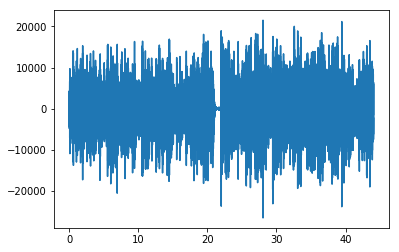

In [30]:
Time=np.linspace(0, len(data)/rate, num=len(data))
plt.plot(Time,data);

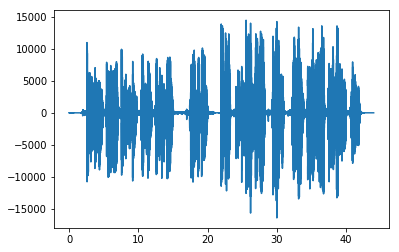

In [31]:
Time=np.linspace(0, len(data)/rate, num=len(data))
plt.plot(Time,data2);

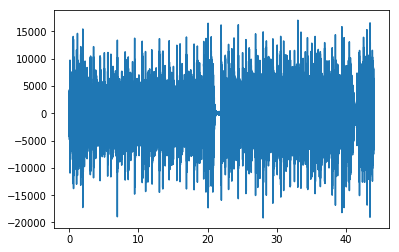

In [32]:
Time=np.linspace(0, len(data)/rate, num=len(data3))
plt.plot(Time,data3);

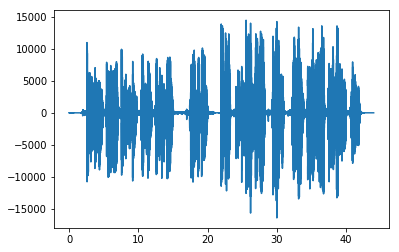

In [33]:
data3 = np.append(data3,np.zeros(22))
data4 = data2
Time=np.linspace(0, len(data4)/rate, num=len(data4))
plt.plot(Time,data4);

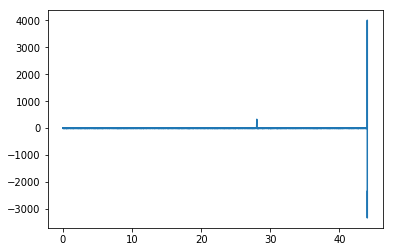

In [34]:
data4 = data - data2 - data3
Time=np.linspace(0, len(data)/rate, num=len(data4))
plt.plot(Time,data4);

In [35]:
f,t,Sxx = signal.stft(data,rate,nperseg=1000)
f2,t2,Sxx2 = signal.stft(data2,rate2,nperseg=1000)
f3,t3,Sxx3 = signal.stft(data3,rate3,nperseg=1000)

In [36]:
t, xrec = signal.istft(Sxx, rate)

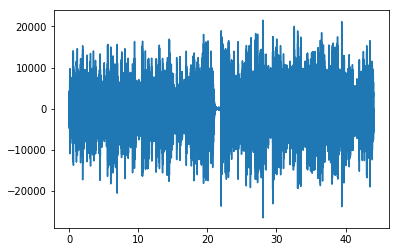

In [37]:
plt.plot(t,xrec)

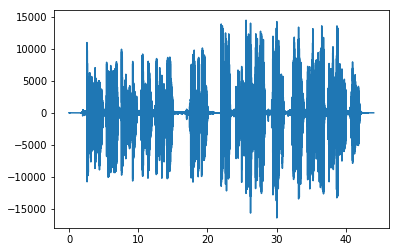

In [38]:
t2, xrec2 = signal.istft(Sxx2, rate2)
plt.plot(t2,xrec2);

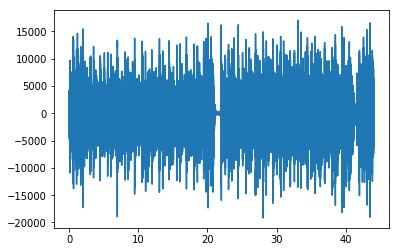

In [39]:
t3, xrec3 = signal.istft(Sxx3, rate3)
plt.plot(t3,xrec3);

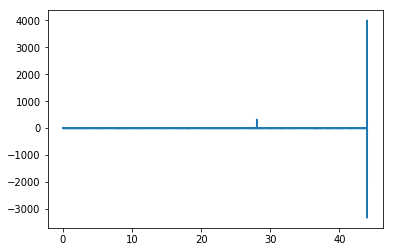

In [40]:
#t2, xrec2 = signal.istft(Sxx2, rate2)
plt.plot(t2,xrec - xrec2 - xrec3);

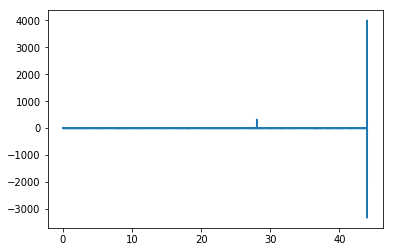

In [41]:
reconstructedMixture = np.abs(Sxx2)*np.exp(1j * np.angle(Sxx2)) + np.abs(Sxx3)*np.exp(1j * np.angle(Sxx3))
t4, xrec4 = signal.istft(reconstructedMixture, rate)
plt.plot(t4,xrec-xrec4)

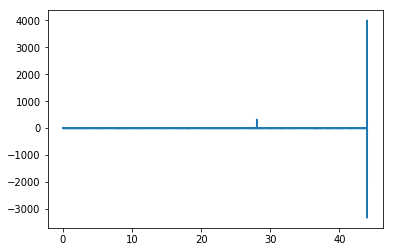

In [42]:
reconstructedMixture2 = np.abs(Sxx)*np.exp(1j * np.angle(Sxx)) - (np.abs(Sxx2)*np.exp(1j * np.angle(Sxx2)) + np.abs(Sxx3)*np.exp(1j * np.angle(Sxx3)))
t5, xrec5 = signal.istft(reconstructedMixture2, rate)
plt.plot(t5,xrec5);

In [62]:
reconstructedMixture2 = np.abs(Sxx)*np.exp(1j* np.angle(Sxx)) - (np.abs(Sxx3)*np.exp(1j * np.angle(Sxx)))

In [63]:
t5, xrec5 = signal.istft(reconstructedMixture2, rate2)
display.Audio(xrec5,rate=rate)

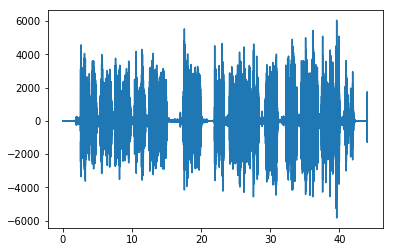

In [65]:
plt.plot(t5,xrec5)

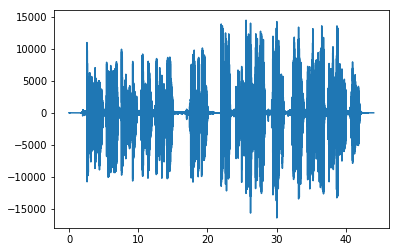

In [66]:
plt.plot(t5,xrec2)